In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_excel(r"C:\Users\Uer\Documents\9.FELEV\data\student-por.xlsx")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
df = df.drop_duplicates()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
#check missing values 
missing_values = df.isnull().sum()
missing_values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
#check duplicates 
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
print("\nChecking data types:")
print(df.dtypes)


Checking data types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [ ]:
#rename column title 
df.rename(columns={'Medu': 'mother education'}, inplace=True)
df.rename(columns={'Pstatus': 'Parent Status'}, inplace=True)
df.rename(columns={'Fedu': 'Father education'}, inplace=True)
df.rename(columns={'Mjob': 'Mother Job '}, inplace=True)
df.rename(columns={'Fjob': 'Father Job '}, inplace=True)
df.rename(columns={'reason': 'reason to choose this school '}, inplace=True)
df.rename(columns={'schoolsup': 'extra educational support'}, inplace=True)
df.rename(columns={'famsup': 'family educational support '}, inplace=True)
df.rename(columns={'paid': 'extra paid classes within the course subject'}, inplace=True)
df.rename(columns={'activities': 'extra-curricular activities'}, inplace=True)
df.rename(columns={'nursery': 'attended nursery school'}, inplace=True)
df.rename(columns={'higher': 'Wants higher education'}, inplace=True)
df.rename(columns={'G1': 'first period grade'}, inplace=True)
df.rename(columns={'G2': 'second period grade'}, inplace=True)
df.rename(columns={'G3': 'third period grade'}, inplace=True)
df

,school,sex,age,address,famsize,Parent Status,mother education,Father education,Mother Job,Father Job,...,famrel,freetime,goout,Dalc,Walc,health,absences,first period grade,second period grade,third period grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
#Exploratory Data Analysis (EDA)
#average
averageGratuationScore = df['third period grade'].mean()
avarageStudentage = df['age'].mean()
averageGratuationScore

11.906009244992296

In [ ]:
avarageStudentage = df['age'].mean()
avarageStudentage

16.7442218798151

In [ ]:
#median
medianStudentfreetime = df["freetime"].median()
medianStudentfreetime

3.0

In [ ]:
medianThirdPeriodGradeScore = df["third period grade"].median()
medianThirdPeriodGradeScore

12.0

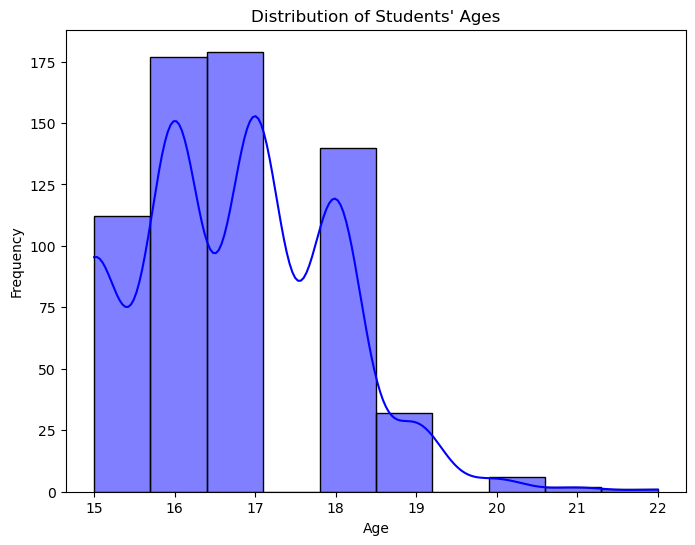

In [ ]:
#analysis question 1 : What is the distribution of students' ages?
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=10, color='blue')
plt.title("Distribution of Students' Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\Uer\AppData\Local\Temp\ipykernel_19148\2573828858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='traveltime', y='studytime', palette='coolwarm')


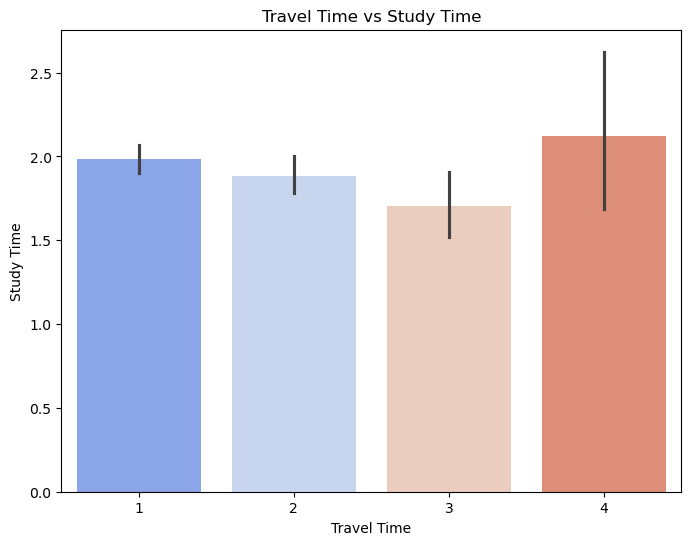

In [ ]:
#analysis question 2: Travel time and study time
if "traveltime" in df.columns and "studytime" in df.columns : 
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x='traveltime', y='studytime', palette='coolwarm')
    plt.title("Travel Time vs Study Time")
    plt.xlabel("Travel Time")
    plt.ylabel("Study Time")
    plt.show()

C:\Users\Uer\AppData\Local\Temp\ipykernel_19148\76658637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='mother education', y='third period grade', palette='viridis')


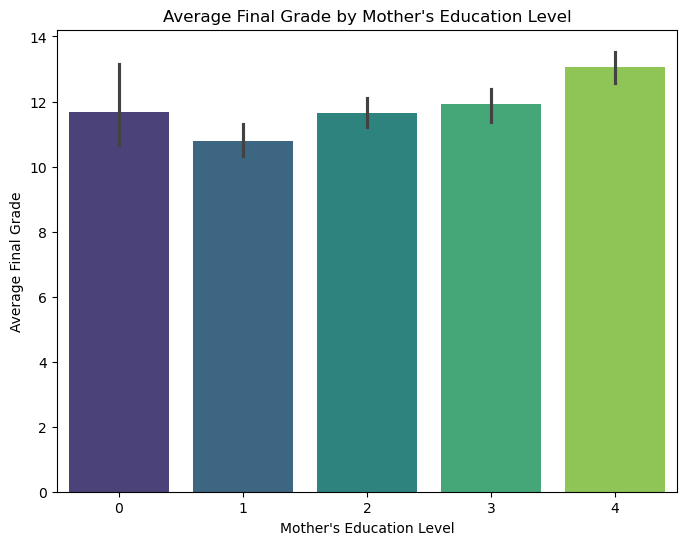

In [ ]:
#analysis question 2: Average grade by parental education level
if "mother education" in df.columns and "third period grade" in df.columns :
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x='mother education', y='third period grade', palette='viridis')
    plt.title("Average Final Grade by Mother's Education Level")
    plt.xlabel("Mother's Education Level")
    plt.ylabel("Average Final Grade")
    plt.show()
    


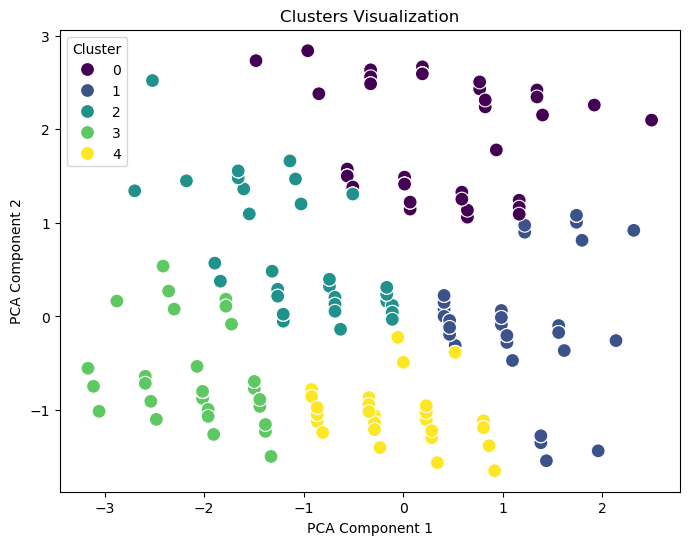

In [ ]:
#clustering implementation using K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
df.rename(columns=lambda x: x.strip(), inplace=True)
features = df[['studytime', 'traveltime', 'mother education', 'Father education']]
features = features.dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
kmeans = KMeans(n_clusters=5, random_state=42)  
clusters = kmeans.fit_predict(reduced_features)
df['Cluster'] = clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusters, palette='viridis', s=100)
plt.title("Clusters Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette:.2f}")

Silhouette Score: 0.24
